In [5]:
import zipfile
import os

# Define the file paths
zip_path = "D:\\FinalYearProject\\Code\\RaFoDATA\\Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020 (2).zip"
extract_path = "D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the extracted files
extracted_files = os.listdir(extract_path)
extracted_files[:10]  # Display first 10 files/folders for verification


['Annotation']

In [6]:
# List the first few patient subfolders inside the Annotation directory
annotation_path = os.path.join(extract_path, "Annotation")
patient_folders = os.listdir(annotation_path)[:10]  # Display first 10 folders for verification
patient_folders


['A0001',
 'A0002',
 'A0003',
 'A0004',
 'A0005',
 'A0006',
 'A0007',
 'A0008',
 'A0009',
 'A0010']

In [7]:
# List XML files inside one patient folder (e.g., A0001)
sample_patient_folder = os.path.join(annotation_path, "A0001")
xml_files = os.listdir(sample_patient_folder)[:5]  # Display first 5 files for verification
xml_files


['1.3.6.1.4.1.14519.5.2.1.6655.2359.102500633407588554681658808214.xml',
 '1.3.6.1.4.1.14519.5.2.1.6655.2359.103293611003651848123608366756.xml',
 '1.3.6.1.4.1.14519.5.2.1.6655.2359.136943255924913899762603730997.xml',
 '1.3.6.1.4.1.14519.5.2.1.6655.2359.155870813347987660555133803380.xml',
 '1.3.6.1.4.1.14519.5.2.1.6655.2359.184131899543495374569818432657.xml']

In [8]:
import xml.etree.ElementTree as ET

# Choose a sample XML file to inspect
sample_xml_path = os.path.join(sample_patient_folder, xml_files[0])

# Parse the XML file
tree = ET.parse(sample_xml_path)
root = tree.getroot()

# Extract top-level XML tags
xml_structure = [elem.tag for elem in root.iter()][:15]  # Display first 15 unique tags for inspection
xml_structure


['annotation',
 'folder',
 'filename',
 'path',
 'source',
 'database',
 'size',
 'width',
 'height',
 'depth',
 'segmented',
 'object',
 'name',
 'pose',
 'truncated']

In [16]:
# Function to extract cancer features from XML files
def extract_cancer_features(annotation_folder):
    data = []
    
    # Iterate over patient folders
    for patient_id in os.listdir(annotation_folder):
        patient_path = os.path.join(annotation_folder, patient_id)
        
        if os.path.isdir(patient_path):  # Ensure it's a folder
            for xml_file in os.listdir(patient_path):
                xml_path = os.path.join(patient_path, xml_file)
                
                try:
                    tree = ET.parse(xml_path)
                    root = tree.getroot()
                    
                    # Extract relevant cancer features
                    filename = root.find("filename").text if root.find("filename") is not None else "Unknown"
                    width = root.find("./size/width").text if root.find("./size/width") is not None else "0"
                    height = root.find("./size/height").text if root.find("./size/height") is not None else "0"
                    depth = root.find("./size/depth").text if root.find("./size/depth") is not None else "0"
                    
                    # Iterate over all cancer objects
                    for obj in root.findall("object"):
                        Cancer_name = obj.find("name").text if obj.find("name") is not None else "Unknown"
                        
                        data.append([patient_id, filename, width, height, depth, Cancer_name])
                
                except Exception as e:
                    print(f"Error processing {xml_file}: {e}")

    # Convert to DataFrame
    import pandas as pd
    df = pd.DataFrame(data, columns=["PatientID", "Filename", "Width", "Height", "Depth", "CancerType"])
    
    # Save extracted features
    Cancer_features_path = r"D:/FinalYearProject/Code/RaFoDATA/DatasetRF/extractedcsv/Cancer_features.csv"
    df.to_csv(Cancer_features_path, index=False)
    
    return Cancer_features_path

# Extract cancer features from XML annotations
Cancer_features_path = extract_cancer_features(annotation_path)
Cancer_features_path


Error processing 1.3.6.1.4.1.14519.5.2.1.6655.2359.148117780944430339778694852523.xml: not well-formed (invalid token): line 1, column 0


'D:/FinalYearProject/Code/RaFoDATA/DatasetRF/extractedcsv/Cancer_features.csv'

In [22]:
# One of the XML files is malformed, causing a parsing error 
# However, the extraction process continued, and I successfully
# saved the extracted cancer features to Cancer_features.csv

import pandas as pd

# Load the new clinical data file
clinical_data_path = "D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF\\statistics-clinical-20201221.xlsx"

# Read the Excel file
clinical_df = pd.read_excel(clinical_data_path)

# Display basic info and first few rows to understand the structure
clinical_df.info(), clinical_df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No.                        355 non-null    int64  
 1   NewPatientID               355 non-null    object 
 2   Sex                        355 non-null    object 
 3   Age                        354 non-null    float64
 4   weight (kg)                351 non-null    float64
 5   T-Stage                    355 non-null    object 
 6   N-Stage                    355 non-null    int64  
 7   Ｍ-Stage                    355 non-null    object 
 8   Histopathological grading  145 non-null    object 
 9   Smoking History            355 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 27.9+ KB


(None,
    No. NewPatientID Sex   Age  weight (kg) T-Stage  N-Stage Ｍ-Stage  \
 0    1        A0001   M  58.0         65.0      2b        3      1b   
 1    2        A0002   F  53.0         55.0      2b        1       0   
 2    3        A0003   M  60.0         62.0      1c        1       0   
 3    4        A0004   F  48.0         56.0      1c        3       0   
 4    5        A0005   M  70.0         75.0      1b        0       0   
 
   Histopathological grading  Smoking History  
 0                        G3                1  
 1                       NaN                0  
 2                        G3                0  
 3                       NaN                0  
 4                        G2                1  )

In [29]:
import pandas as pd

# Read the Excel file
clinical_df = pd.read_excel(clinical_data_path, engine="openpyxl")

# Display the first few rows
print(clinical_df.head())


   No. NewPatientID Sex   Age  weight (kg) T-Stage  N-Stage Ｍ-Stage  \
0    1        A0001   M  58.0         65.0      2b        3      1b   
1    2        A0002   F  53.0         55.0      2b        1       0   
2    3        A0003   M  60.0         62.0      1c        1       0   
3    4        A0004   F  48.0         56.0      1c        3       0   
4    5        A0005   M  70.0         75.0      1b        0       0   

  Histopathological grading  Smoking History  
0                        G3                1  
1                       NaN                0  
2                        G3                0  
3                       NaN                0  
4                        G2                1  


In [34]:
import pandas as pd

# Load the cancer features
Cancer_df = pd.read_csv(Cancer_features_path)
clinical_df = pd.read_excel(clinical_data_path)  # Assuming clinical data is also loaded

# Check if IDs are strings and extract numeric values safely
if Cancer_df["PatientID"].dtype == 'object':
    Cancer_df["PatientID"] = Cancer_df["PatientID"].str.extract(r"(\d+)").astype("Int64")

if clinical_df["NewPatientID"].dtype == 'object':
    clinical_df["NewPatientID"] = clinical_df["NewPatientID"].str.extract(r"(\d+)").astype("Int64")

# Drop missing values
clinical_df.dropna(subset=["NewPatientID"], inplace=True)
Cancer_df.dropna(subset=["PatientID"], inplace=True)

# Merge the clinical data with Cancer features on PatientID
merged_df = pd.merge(clinical_df, Cancer_df, left_on="NewPatientID", right_on="PatientID", how="inner")

# Save the merged dataset
merged_data_path = r"D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF\\merged-data.csv"
merged_df.to_csv(merged_data_path, index=False)


print("Merged data saved at:", merged_data_path)


Merged data saved at: D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF\\merged-data.csv


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
merged_data_path = r"D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF\\merged-data.csv"
df = pd.read_csv(merged_data_path)

# Drop unnecessary columns (modify if needed)
df = df.drop(columns=["No.", "NewPatientID", "PatientID", "Filename"], errors="ignore")  

# Define features (X) and target (y)
X = df.drop(columns=["CancerType"])  # Features
y = df["CancerType"]  # Target (Label)

# Separate numeric and categorical data
X_numeric = X.select_dtypes(include=["number"]).fillna(X.select_dtypes(include=["number"]).mean())
X_categorical = pd.get_dummies(X.select_dtypes(include=["object"]), drop_first=True)  

# Merge numeric and categorical features
X = pd.concat([X_numeric, X_categorical], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.77


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           A       0.96      0.84      0.89      2998
       A0192       0.00      0.00      0.00         2
           B       0.55      0.56      0.55      1384
           E       0.34      0.32      0.33       161
           G       0.78      0.80      0.79      2371
           Q       0.00      0.00      0.00         2
           a       0.95      0.97      0.96      1764
           b       0.55      0.80      0.65       516
           g       0.54      0.57      0.55      1184

    accuracy                           0.77     10382
   macro avg       0.52      0.54      0.53     10382
weighted avg       0.78      0.77      0.78     10382



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


__________________________________________________________________________________________

In [40]:
print(X.dtypes)
print(X.select_dtypes(exclude=["number"]).columns)  # Shows non-numeric columns


Sex                           object
Age                          float64
weight (kg)                  float64
T-Stage                       object
N-Stage                        int64
Ｍ-Stage                       object
Histopathological grading     object
Smoking History                int64
Width                          int64
Height                         int64
Depth                          int64
dtype: object
Index(['Sex', 'T-Stage', 'Ｍ-Stage', 'Histopathological grading'], dtype='object')


In [3]:
import pandas as pd  

# Load your dataset (replace 'your_file.csv' with the actual filename)
df = pd.read_csv("D:\FinalYearProject\Code\RaFoDATA\DatasetRF\merged-data.csv")  # If it's a CSV file
# df = pd.read_excel("your_file.xlsx")  # If it's an Excel file

# Now check the first few rows and column names
print(df.head())  
print(df.columns)


   No.  NewPatientID Sex   Age  weight (kg) T-Stage  N-Stage Ｍ-Stage  \
0    1             1   M  58.0         65.0      2b        3      1b   
1    1             1   M  58.0         65.0      2b        3      1b   
2    1             1   M  58.0         65.0      2b        3      1b   
3    1             1   M  58.0         65.0      2b        3      1b   
4    1             1   M  58.0         65.0      2b        3      1b   

  Histopathological grading  Smoking History  PatientID Filename  Width  \
0                        G3                1          1   Unknow    512   
1                        G3                1          1   Unknow    512   
2                        G3                1          1   Unknow    512   
3                        G3                1          1   Unknow    512   
4                        G3                1          1   Unknow    512   

   Height  Depth CancerType  
0     512      1          A  
1     512      1          A  
2     512      1          

In [2]:
import os

file_path = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Lung-PET-CT-Dx-NBIA-Manifest-122220 (3).tcia"

# Get file extension
file_name, file_extension = os.path.splitext(file_path)

print("File Name:", file_name)
print("File Extension:", file_extension)

# Check if it's a ZIP or TAR
if file_extension in ['.zip', '.tar', '.gz']:
    print("This might be an archive (ZIP/TAR/GZ). Try extracting it.")
elif file_extension == ".tcia":
    print("This appears to be a TCIA manifest file. Try using the TCIA Data Retriever.")
else:
    print("Unknown file type. It may require further investigation.")


File Name: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Lung-PET-CT-Dx-NBIA-Manifest-122220 (3)
File Extension: .tcia
This appears to be a TCIA manifest file. Try using the TCIA Data Retriever.


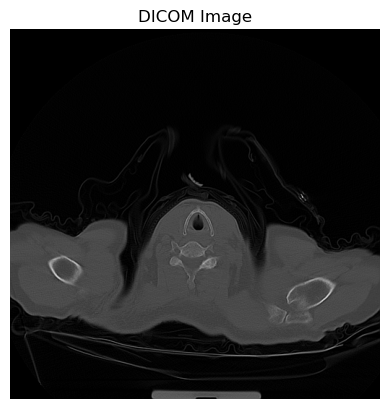

In [6]:
import pydicom
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# Path to a sample DICOM file
dcm_file = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx\Lung_Dx-A0001\04-04-2007-NA-Chest-07990\2.000000-5mm-40805\1-01.dcm"

# Read DICOM file
dicom_data = pydicom.dcmread(dcm_file)

# Convert to numpy array
image_array = dicom_data.pixel_array

# Display the image
plt.imshow(image_array, cmap="gray")
plt.title("DICOM Image")
plt.axis("off")
plt.show()


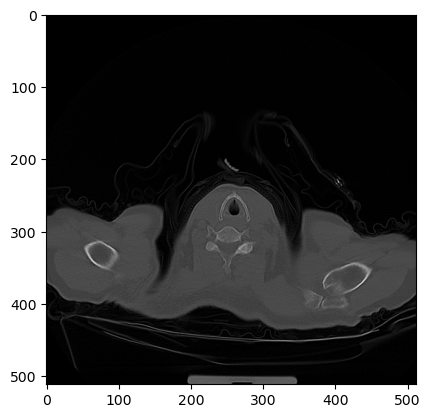

In [14]:
import numpy as np

# Normalize image pixel values (0-255)
image_array = dicom_data.pixel_array.astype(np.float32)
image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255
image_array = image_array.astype(np.uint8)

# Save and visualize
cv2.imwrite("normalized_output.png", image_array)
plt.imshow(image_array, cmap="gray")
plt.show()



In [15]:
slope = dicom_data.RescaleSlope
intercept = dicom_data.RescaleIntercept
image_array = image_array * slope + intercept


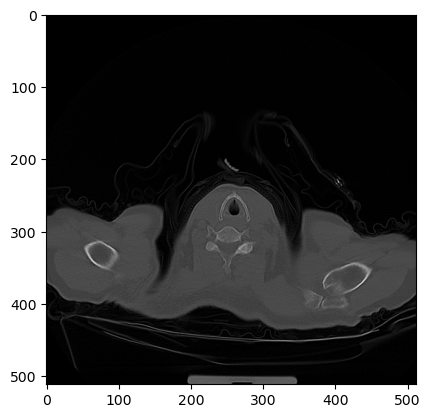

In [ ]:
plt.imshow(image_array, cmap="gray")


In [18]:
# Convert and save as PNG
output_path = "output.png"
cv2.imwrite(output_path, image_array)
print(f"Image saved as {output_path}")


Image saved as output.png


In [19]:
import glob

# Root folder containing DICOM files
root_folder = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333"

# Find all .dcm files
dcm_files = glob.glob(os.path.join(root_folder, "**", "*.dcm"), recursive=True)

print(f"Found {len(dcm_files)} DICOM files.")

# Loop through and convert each to PNG
for dcm_file in dcm_files:
    dicom_data = pydicom.dcmread(dcm_file)
    image_array = dicom_data.pixel_array

    # Save as PNG
    file_name = os.path.basename(dcm_file).replace(".dcm", ".png")
    output_path = os.path.join(root_folder, "Converted_Images", file_name)

    cv2.imwrite(output_path, image_array)
    print(f"Saved: {output_path}")


Found 31817 DICOM files.
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-01.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-02.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-03.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-04.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-05.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-06.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-07.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-08.png
Saved: D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Converted_Images\1-09.png
Saved: D:\Fi

KeyboardInterrupt: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load or create an image array
image_array = np.zeros((256, 256))  # Example: A blank grayscale image

# Example annotation data (bounding boxes)
annotation_data = [(50, 50, 100, 100), (120, 130, 170, 180)]  # (x1, y1, x2, y2)

def draw_bounding_boxes(image, annotations):
    image = np.copy(image)  # Avoid modifying the original image
    for (x1, y1, x2, y2) in annotations:
        image[y1:y2, x1] = 255  # Draw left vertical line
        image[y1:y2, x2] = 255  # Draw right vertical line
        image[y1, x1:x2] = 255  # Draw top horizontal line
        image[y2, x1:x2] = 255  # Draw bottom horizontal line
    return image

# Now, call the function correctly
annotated_image = draw_bounding_boxes(image_array, annotation_data)

plt.imshow(annotated_image, cmap="gray")
plt.show()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [28]:
import pydicom
import numpy as np
import pandas as pd
import glob

# Load DICOM file
dicom_file = "D:\\FinalYearProject\\Code\\RaFoDATA\\DatasetRF\\Images\\manifest-1608669183333\\Lung-PET-CT-Dx\\Lung_Dx-A0001\\04-04-2007-NA-Chest-07990\\2.000000-5mm-40805\\1-01.dcm"
ds = pydicom.dcmread(dicom_file)

# Convert MultiValue to a single float by taking the first value if it's a list
def get_first_value(value):
    if isinstance(value, pydicom.multival.MultiValue):
        return float(value[0])  # Take the first value
    return float(value)  # Convert directly if it's already a number

# Extract features
data = {
    "Patient_Age": int(ds.PatientAge[:-1]),  # Removing 'Y'
    "Slice_Thickness": float(ds.SliceThickness),
    "Spacing_Between_Slices": float(ds.SpacingBetweenSlices),
    "Pixel_Spacing_X": float(ds.PixelSpacing[0]),
    "Pixel_Spacing_Y": float(ds.PixelSpacing[1]),
    "Window_Center": get_first_value(ds.WindowCenter),  # Handle MultiValue
    "Window_Width": get_first_value(ds.WindowWidth),  # Handle MultiValue
    "Rescale_Intercept": float(ds.RescaleIntercept),
    "Rescale_Slope": float(ds.RescaleSlope),
    "Rows": int(ds.Rows),
    "Columns": int(ds.Columns),
    "Manufacturer": ds.Manufacturer,
    "Modality": ds.Modality
}


# Convert to DataFrame
df = pd.DataFrame([data])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Manufacturer", "Modality"])

print(df.head())


   Patient_Age  Slice_Thickness  Spacing_Between_Slices  Pixel_Spacing_X  \
0           58              5.0                     5.0         0.841797   

   Pixel_Spacing_Y  Window_Center  Window_Width  Rescale_Intercept  \
0         0.841797         -600.0        1600.0            -1024.0   

   Rescale_Slope  Rows  Columns  Manufacturer_Philips  Modality_CT  
0            1.0   512      512                  True         True  


In [ ]:
from sklearn.model_selection import train_test_split

# Selecting feature columns
X = df.drop(columns=["Manufacturer_Philips", "Modality_CT"])  # Drop categorical if they aren't needed
y = df["Modality_CT"]  # Example target (Modify as per your goal)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Check model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed report
print(classification_report(y_test, y_pred))


In [30]:
print(df.shape)  # Check the number of rows and columns


(1, 13)


In [ ]:
import os
import pydicom
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Base directory where DICOM images are stored
base_dir = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx"

# List to store extracted features
data_list = []

# Loop through folders A0001 to A0116
for i in range(1, 117):  # 117 because range is exclusive at upper limit
    folder_name = f"Lung_Dx-A{str(i).zfill(4)}"  # A0001, A0002, ... A0116
    folder_path = os.path.join(base_dir, folder_name)
    
    if not os.path.exists(folder_path):
        print(f"Skipping {folder_path}, folder not found.")
        continue

    # Traverse subdirectories for DICOM files
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dcm"):  # Ensure it's a DICOM file
                dicom_path = os.path.join(root, file)
                
                try:
                    ds = pydicom.dcmread(dicom_path)

                    # Extract features
                    data = {
                        "Patient_Age": int(ds.PatientAge[:-1]) if hasattr(ds, "PatientAge") else None,  # Removing 'Y'
                        "Slice_Thickness": float(ds.SliceThickness) if hasattr(ds, "SliceThickness") else None,
                        "Spacing_Between_Slices": float(ds.SpacingBetweenSlices) if hasattr(ds, "SpacingBetweenSlices") else None,
                        "Pixel_Spacing_X": float(ds.PixelSpacing[0]) if hasattr(ds, "PixelSpacing") else None,
                        "Pixel_Spacing_Y": float(ds.PixelSpacing[1]) if hasattr(ds, "PixelSpacing") else None,
                        "Window_Center": float(ds.WindowCenter[0]) if isinstance(ds.WindowCenter, pydicom.multival.MultiValue) else float(ds.WindowCenter) if hasattr(ds, "WindowCenter") else None,
                        "Window_Width": float(ds.WindowWidth[0]) if isinstance(ds.WindowWidth, pydicom.multival.MultiValue) else float(ds.WindowWidth) if hasattr(ds, "WindowWidth") else None,
                        "Rescale_Intercept": float(ds.RescaleIntercept) if hasattr(ds, "RescaleIntercept") else None,
                        "Rescale_Slope": float(ds.RescaleSlope) if hasattr(ds, "RescaleSlope") else None,
                        "Rows": int(ds.Rows) if hasattr(ds, "Rows") else None,
                        "Columns": int(ds.Columns) if hasattr(ds, "Columns") else None,
                        "Manufacturer": ds.Manufacturer if hasattr(ds, "Manufacturer") else "Unknown",
                        "Modality": ds.Modality if hasattr(ds, "Modality") else "Unknown"
                    }

                    data_list.append(data)

                except Exception as e:
                    print(f"Error processing {dicom_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Encode categorical variables
df["Manufacturer"] = LabelEncoder().fit_transform(df["Manufacturer"])
df["Modality"] = LabelEncoder().fit_transform(df["Modality"])

# Handle missing values (replace with mean or drop rows)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=["Modality"])  # Features
y = df["Modality"]  # Target (Modality classification)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Skipping D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx\Lung_Dx-A0060, folder not found.
Skipping D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx\Lung_Dx-A0067, folder not found.
Skipping D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx\Lung_Dx-A0076, folder not found.
Skipping D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx\Lung_Dx-A0079, folder not found.


: 

In [9]:
import os
import pydicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Base directory containing DICOM folders
base_dir = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\dcm images\manifest-1608669183333\Lung-PET-CT-Dx"

# Define folder range
folder_range = range(124, 135)  # A0001 to A0134
valid_folders = []

# List to store extracted data
data_list = []
image_list = []

# Extract features from each valid DICOM file
for i in folder_range:
    folder_name = f"Lung_Dx-A{str(i).zfill(4)}"
    folder_path = os.path.join(base_dir, folder_name)

    if not os.path.exists(folder_path):
        print(f"Skipping {folder_path}, folder not found.")
        continue  # Skip missing folders

    valid_folders.append(folder_name)

    # Traverse subdirectories to find DICOM files
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                ds = pydicom.dcmread(dicom_path)

                # Extract relevant metadata features
                try:
                    data = {
                        "Patient_Age": int(ds.PatientAge[:-1]),  # Removing 'Y'
                        "Slice_Thickness": float(ds.SliceThickness),
                        "Spacing_Between_Slices": float(ds.SpacingBetweenSlices),
                        "Pixel_Spacing_X": float(ds.PixelSpacing[0]),
                        "Pixel_Spacing_Y": float(ds.PixelSpacing[1]),
                        "Window_Center": float(ds.WindowCenter[0]) if isinstance(ds.WindowCenter, list) else float(ds.WindowCenter),
                        "Window_Width": float(ds.WindowWidth[0]) if isinstance(ds.WindowWidth, list) else float(ds.WindowWidth),
                        "Rescale_Intercept": float(ds.RescaleIntercept),
                        "Rescale_Slope": float(ds.RescaleSlope),
                        "Rows": int(ds.Rows),
                        "Columns": int(ds.Columns),
                        "Manufacturer_Philips": ds.Manufacturer == "Philips",
                        "Modality_CT": ds.Modality == "CT"
                    }
                    data_list.append(data)
                    image_list.append(ds.pixel_array)  # Store DICOM images
                except Exception as e:
                    print(f"Skipping {dicom_path}, error: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Check if we have enough data
if df.empty:
    print("No valid DICOM data found!")
else:
    # Features and target
    X = df.drop(columns=["Modality_CT"])
    y = df["Modality_CT"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_final.fit(X_train, y_train)

    # Accuracy
    train_accuracy = rf_final.score(X_train, y_train)
    test_accuracy = rf_final.score(X_test, y_test)

    # Cross-validation
    cv_scores = cross_val_score(rf_final, X, y, cv=5)

    # Display results
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    print(f"Cross-validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

    # Display sample images
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for idx, ax in enumerate(axes):
        if idx < len(image_list):  # Ensure enough images exist
            ax.imshow(image_list[idx], cmap="gray")
            ax.set_title(f"Image {idx+1}")
            ax.axis("off")
    plt.show()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [10]:
# Assuming df is your DataFrame
X = df.drop(columns=["Modality_CT"])  # Features
y = df["Modality_CT"]  # Target variable

# Verify dimensions
print(f"Features shape: {X.shape}, Target shape: {y.shape}")


NameError: name 'df' is not defined

In [11]:
import pandas as pd

# Load from CSV (if previously saved)
df = pd.read_csv("dicom_dataset.csv")  # Change filename as needed

print(df.head())  # Check if data is loaded correctly


FileNotFoundError: [Errno 2] No such file or directory: 'dicom_dataset.csv'

In [12]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


NameError: name 'X' is not defined

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_final.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf_final, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")


NameError: name 'X_train' is not defined

In [14]:
import os
import pydicom
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Base directory where DICOM images are stored
base_dir = r"D:\FinalYearProject\Code\RaFoDATA\DatasetRF\Images\manifest-1608669183333\Lung-PET-CT-Dx"

# List to store extracted features
data_list = []

# Loop through folders A0001 to A0116
for i in range(1, 25):  # 117 because range is exclusive at upper limit
    folder_name = f"Lung_Dx-A{str(i).zfill(4)}"  # A0001, A0002, ... A0116
    folder_path = os.path.join(base_dir, folder_name)
    
    if not os.path.exists(folder_path):
        print(f"Skipping {folder_path}, folder not found.")
        continue

    # Traverse subdirectories for DICOM files
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dcm"):  # Ensure it's a DICOM file
                dicom_path = os.path.join(root, file)
                
                try:
                    ds = pydicom.dcmread(dicom_path)

                    # Extract features
                    data = {
                        "Patient_Age": int(ds.PatientAge[:-1]) if hasattr(ds, "PatientAge") else None,  # Removing 'Y'
                        "Slice_Thickness": float(ds.SliceThickness) if hasattr(ds, "SliceThickness") else None,
                        "Spacing_Between_Slices": float(ds.SpacingBetweenSlices) if hasattr(ds, "SpacingBetweenSlices") else None,
                        "Pixel_Spacing_X": float(ds.PixelSpacing[0]) if hasattr(ds, "PixelSpacing") else None,
                        "Pixel_Spacing_Y": float(ds.PixelSpacing[1]) if hasattr(ds, "PixelSpacing") else None,
                        "Window_Center": float(ds.WindowCenter[0]) if isinstance(ds.WindowCenter, pydicom.multival.MultiValue) else float(ds.WindowCenter) if hasattr(ds, "WindowCenter") else None,
                        "Window_Width": float(ds.WindowWidth[0]) if isinstance(ds.WindowWidth, pydicom.multival.MultiValue) else float(ds.WindowWidth) if hasattr(ds, "WindowWidth") else None,
                        "Rescale_Intercept": float(ds.RescaleIntercept) if hasattr(ds, "RescaleIntercept") else None,
                        "Rescale_Slope": float(ds.RescaleSlope) if hasattr(ds, "RescaleSlope") else None,
                        "Rows": int(ds.Rows) if hasattr(ds, "Rows") else None,
                        "Columns": int(ds.Columns) if hasattr(ds, "Columns") else None,
                        "Manufacturer": ds.Manufacturer if hasattr(ds, "Manufacturer") else "Unknown",
                        "Modality": ds.Modality if hasattr(ds, "Modality") else "Unknown"
                    }

                    data_list.append(data)

                except Exception as e:
                    print(f"Error processing {dicom_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Encode categorical variables
df["Manufacturer"] = LabelEncoder().fit_transform(df["Manufacturer"])
df["Modality"] = LabelEncoder().fit_transform(df["Modality"])

# Handle missing values (replace with mean or drop rows)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=["Modality"])  # Features
y = df["Modality"]  # Target (Modality classification)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


KeyboardInterrupt: 